###### .<center> **Proyecto Primer Parcial-Análisis de datos**

. <center> *Tema: **"Análisis y Visualización de Datos "*** 
.<center>*Nombre*: **Juan Pablo Molina**

## Introducción

A medida que se ha desarrollado la industria de la construcción, gran parte de las investigaciones se han centrado en el desarrollo de nuevos materiales y metodologías alternativas. Como una de las acciones alternas mas sostenibles y acogidas por otros ingenieros, se tienen a las llantas, cuyo desperdicio se ha utilizado en obras viales, geotécnicas (WBCSD, 2008).

Con la creciente demanda de descubrir nuevas formas de reusar este material, se ha propuesto enormemente el estudio de concreto con agregados de caucho, con el objetivo de transmitir las actividades beneficiosas del caucho como lo son la resistencia, durabilidad, y la elasticidad (Hernández-Olivares et al., 2002).

Los resultados de la investigación de este material, han probado el comportamiento del hormigón bajo distintas concentraciones de caucho, siendo evidente la mejora de la ductilidad y la absorción de energia.

## Objetivos
### General
Procesar datos de ensayos de compresión uniaxial de especímenes compuestos por acero laminado en frío y hormigon con agregados de caucho, mediante código de Python para la generación de gráficos como resultados.
### Específicos 
* Definir funciones para limpiar y estructurar los datos para facilitar su análisis.
* Agrupar los datos de los especímenes bajo el criterio de comparación con distintas concentraciones de caucho.
* Crear gráficos y mapas que ilustren los gráficos conjuntos de esfuerszo vs deformación.

## Descripción de los datos

La base de datos proporcionada para este proyecto contiene un total de 14437 filas y 13 columnas registrados entre septiembre y octubre del añi 2021.
Cada registro de ensayo incluye:
* Nombre
* Test
* Fechas
* Area de la sección
* Longitud
* Extensión de compresión.

# Metodología

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1) Elección del conjunto de datos a utilizar:

Por la cantidad y forma en la que se transfieren los datos, se ha optado por el uso de un archivo .csv para almacenar el conjunto de datos objenidos en los ensayos de compresión.

## 2) Preparación del Entorno de Trabajo:

**Github:** [Juan Pablo Molina](https://github.com/Bleakslide/Data-analysis-specimens)

## 3) Carga y Preprocesamiento de los Datos:

### 3.1. Cargar el conjunto de datos utilizando pandas

In [2]:
df = pd.read_excel("Datos/RawDataComposites.xlsx")
df

,Name,Test,Start_Date,End_Date,Excluded,Unique_Identifier,Test_Rate_1_mm/min,Shape,Section_Area_mm^2,Lenght_mm,Time_sec,Extension_mm,Load_N
0,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,0.0000,0.00454,-1059.07917
1,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,0.0018,0.00363,-1067.55495
2,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,2.0000,-0.02798,-1521.49200
3,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,4.0000,-0.06340,-1838.67216
4,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,6.0000,-0.09429,-2140.43856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14432,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,322.0000,-5.46975,-21213.98449
14433,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,324.0000,-5.37552,-21112.38241
14434,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,326.0000,-5.53103,-21192.49105
14435,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,328.0000,-5.45104,-21119.39192


### 3.2. Limpieza de datos

In [3]:
# Se verifican los tipos de datos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14437 entries, 0 to 14436
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                14379 non-null  object        
 1   Test                13860 non-null  object        
 2   Start_Date          6835 non-null   datetime64[ns]
 3   End_Date            6835 non-null   datetime64[ns]
 4   Excluded            6835 non-null   float64       
 5   Unique_Identifier   6835 non-null   object        
 6   Test_Rate_1_mm/min  6835 non-null   float64       
 7   Shape               14437 non-null  object        
 8   Section_Area_mm^2   14437 non-null  float64       
 9   Lenght_mm           14379 non-null  float64       
 10  Time_sec            14437 non-null  float64       
 11  Extension_mm        14437 non-null  float64       
 12  Load_N              14437 non-null  float64       
dtypes: datetime64[ns](2), float64(7), object(4)
me

In [4]:
print(df.columns)

Index(['Name', 'Test', 'Start_Date', 'End_Date', 'Excluded',
       'Unique_Identifier', 'Test_Rate_1_mm/min', 'Shape', 'Section_Area_mm^2',
       'Lenght_mm', 'Time_sec', 'Extension_mm', 'Load_N'],
      dtype='object')


In [5]:
# Se define una lista con las columnas de datos indispensables 
important_col = ['Section_Area_mm^2','Lenght_mm', 'Time_sec', 'Extension_mm', 'Load_N']

In [6]:
# Se eliminan las filas que no poseen suficientes o ningun dato para cumplir con el objetivo, o con datos duplicados
def cleaning(df):
    col = df.columns
    df.dropna(how = "all", inplace = True)
    df.dropna(subset = important_col, inplace = True)
    df_drop = df.drop_duplicates(keep='last')
    df_drop = df_drop.reset_index(drop = True)
    return df_drop

In [7]:
df1 = cleaning(df)
df1

,Name,Test,Start_Date,End_Date,Excluded,Unique_Identifier,Test_Rate_1_mm/min,Shape,Section_Area_mm^2,Lenght_mm,Time_sec,Extension_mm,Load_N
0,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,0.0000,0.00454,-1059.07917
1,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,0.0018,0.00363,-1067.55495
2,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,2.0000,-0.02798,-1521.49200
3,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,4.0000,-0.06340,-1838.67216
4,PR0M-1,PR00 pilot intermediate.is_comp_RawData,2021-09-23 14:46:00.000,2021-09-23 14:57:00.000,0.0,{C8DBDEE7-7F74-456E-A893-C74EDF78A1A4},4.0,Rectangular,10000.000000,400.0,6.0000,-0.09429,-2140.43856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14374,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,322.0000,-5.46975,-21213.98449
14375,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,324.0000,-5.37552,-21112.38241
14376,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,326.0000,-5.53103,-21192.49105
14377,R40-cyl4,R40 cylinder 40_4.is_comp_RawData,2021-10-05 14:42:59.995,2021-10-05 14:48:59.995,0.0,{626A444D-01A0-4B05-A1CA-BD9C7EE558FB},1.0,Cylinder,7853.981634,200.0,328.0000,-5.45104,-21119.39192


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14379 entries, 0 to 14378
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                14379 non-null  object        
 1   Test                13860 non-null  object        
 2   Start_Date          6777 non-null   datetime64[ns]
 3   End_Date            6777 non-null   datetime64[ns]
 4   Excluded            6777 non-null   float64       
 5   Unique_Identifier   6777 non-null   object        
 6   Test_Rate_1_mm/min  6777 non-null   float64       
 7   Shape               14379 non-null  object        
 8   Section_Area_mm^2   14379 non-null  float64       
 9   Lenght_mm           14379 non-null  float64       
 10  Time_sec            14379 non-null  float64       
 11  Extension_mm        14379 non-null  float64       
 12  Load_N              14379 non-null  float64       
dtypes: datetime64[ns](2), float64(7), object(4)
me

## 4) Análisis Exploratorio de Datos (EDA):

In [9]:
df1.describe()

,Start_Date,End_Date,Excluded,Test_Rate_1_mm/min,Section_Area_mm^2,Lenght_mm,Time_sec,Extension_mm,Load_N
count,6777,6777,6777.0,6777.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000
mean,2021-10-03 23:23:21.687781120,2021-10-03 23:35:37.704526592,0.0,3.814520,9645.986817,208.581960,194.672078,-4.903834,-133954.380916
min,2021-09-23 12:43:00,2021-09-23 12:56:00,0.0,1.000000,7853.981634,100.000000,0.000000,-101.155110,-606761.097910
25%,2021-10-04 17:17:59.995000064,2021-10-04 17:45:59.995000064,0.0,1.000000,10000.000000,100.000000,32.802900,-5.141610,-170691.221955
50%,2021-10-05 14:26:59.995000064,2021-10-05 14:33:59.995000064,0.0,4.000000,10000.000000,100.000000,67.917800,-2.693030,-95814.836030
75%,2021-10-06 15:14:59.995000064,2021-10-06 15:29:00,0.0,4.000000,10000.000000,200.000000,254.000000,-1.373705,-38083.845380
max,2021-10-07 17:14:00,2021-10-07 17:17:00,0.0,10.000000,10000.000000,600.000000,1680.000000,0.175500,-167.119500
std,NaN,NaN,0.0,2.689288,796.515902,158.849185,274.888200,9.176106,131424.797859


In [10]:
print(f"La fecha de inicio de los ensayos fue el {df1.Start_Date.min():}")

La fecha de inicio de los ensayos fue el 2021-09-23 12:43:00


In [11]:
print(f"La fecha de finalización de los ensayos fue el {df1.Start_Date.max():}")

La fecha de finalización de los ensayos fue el 2021-10-07 17:14:00


In [12]:
print(f"El tiempo promedio de compresión de los especímenes fue de {df1["Test_Rate_1_mm/min"].mean():.3f} mm/min")

El tiempo promedio de compresión de los especímenes fue de 3.815 mm/min


In [13]:
print(f"La máxima longitud de compresión de los especímenes fue de {df1["Extension_mm"].min():.3f} mm")

La máxima longitud de compresión de los especímenes fue de -101.155 mm


In [14]:
print(f"Las longitudes de de los especímenes son de {df1["Lenght_mm"].unique():} mm")

Las longitudes de de los especímenes son de [400. 200. 600. 100.] mm


## 5) Visualización de Datos:

### 5.1. Graficos

In [44]:
def Shape_lenght(df,Shape,Lenght):
    df_SL = df.loc[((df["Lenght_mm"] == Lenght) & (df["Shape"] == Shape)),["Name","Section_Area_mm^2","Lenght_mm","Extension_mm","Load_N"]]
    df_SL ["Extension_mm"] = df_SL ["Extension_mm"]*(-1)
    df_SL ["Load_N"] = df_SL ["Load_N"]*(-1)/1000
    return df_SL.reset_index(drop = True)

In [101]:

def Force_deformation(df_SL,n, pallete_name):
    names = df_SL["Name"].unique()
    palette = sns.color_palette(pallete_name)
    fig, ax = plt.subplots(figsize=(12, 8)) #2. Crear esquema
    k = 0
    for i in names:
        dfone = df_SL[df_SL["Name"]==i].reset_index(drop = True)
        name = dfone["Name"].unique()
        #Create plot with seaborn
        sns.lineplot(data=dfone, x="Extension_mm", y="Load_N", color=palette[k % len(palette)], label=name[0])
        k+=1
    #Set labels and title
    ax.set_ylabel("LOAD (kN)")
    ax.set_xlabel("COMPRESSIVE DEFORMATION (mm)")
    ax.set_title("Test result for "+n)
    plt.grid()
    # Save plot
    plt.show()
    fig.savefig("Plot "+n, dpi=400)
    return
        

In [99]:
df_RS = Shape_lenght(df1,"Rectangular",200)
df_RS

,Name,Section_Area_mm^2,Lenght_mm,Extension_mm,Load_N
0,PR0S-1,10000.0,200.0,0.00206,0.894570
1,PR0S-1,10000.0,200.0,0.00239,0.901723
2,PR0S-1,10000.0,200.0,0.03712,1.322865
3,PR0S-1,10000.0,200.0,0.07167,1.593268
4,PR0S-1,10000.0,200.0,0.10053,1.777840
...,...,...,...,...,...
1371,R20S,10000.0,200.0,18.25852,104.178715
1372,R20S,10000.0,200.0,18.32501,102.926266
1373,R20S,10000.0,200.0,18.52927,102.392149
1374,R20S,10000.0,200.0,18.69151,101.703286


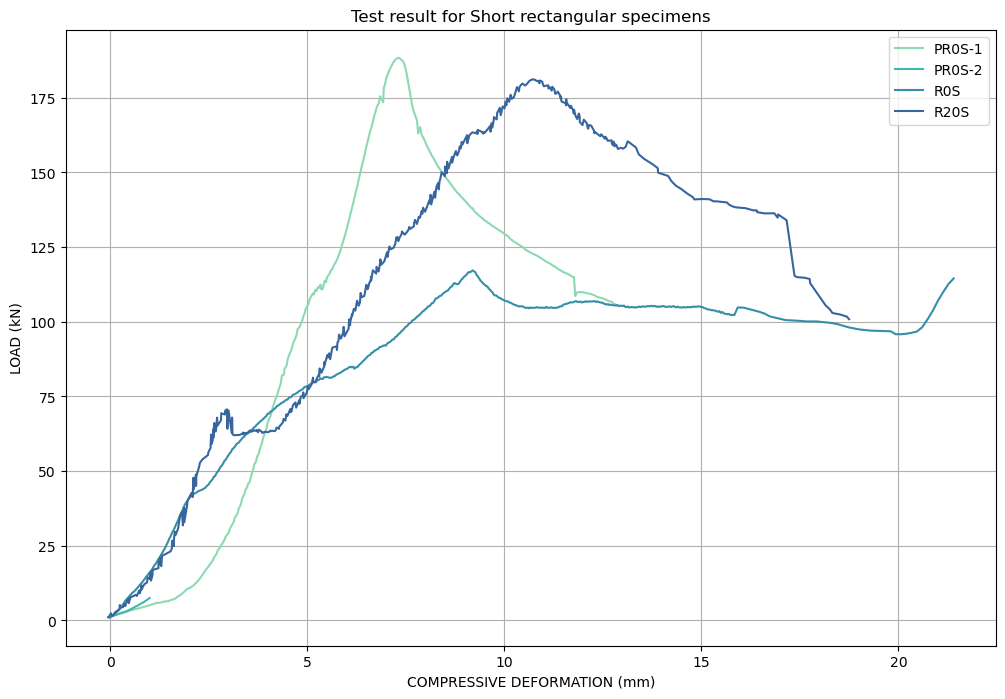

In [102]:
# Visualización de fuerza vs deformación de los especímines tipo rectangular con longitud igual a 200mm
Force_deformation(df_RS, "Short rectangular specimens", "mako_r")

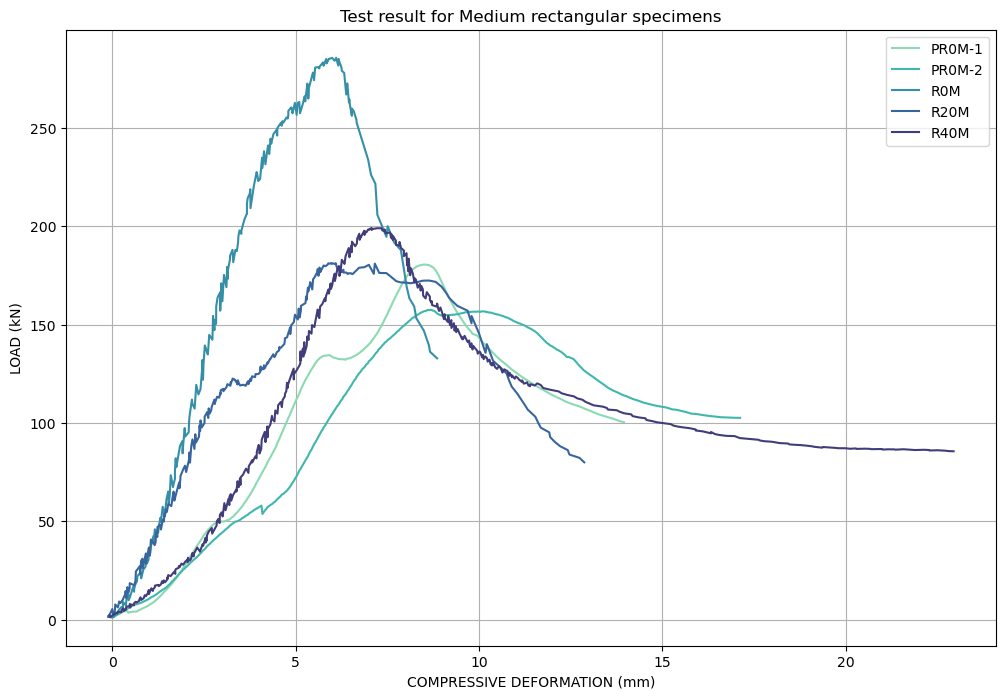

In [104]:
# Visualización de fuerza vs deformación de los especímines tipo rectangular con longitud igual a 400mm
df_RM = Shape_lenght(df1,"Rectangular",400)
Force_deformation(df_RM, "Medium rectangular specimens", "mako_r")

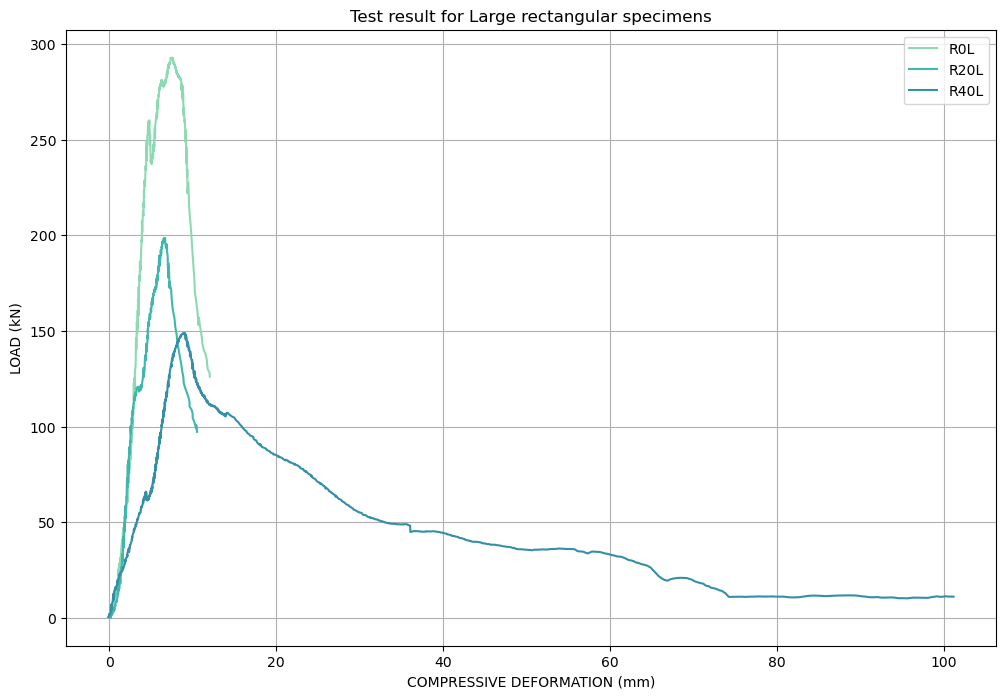

In [105]:
# Visualización de fuerza vs deformación de los especímines tipo rectangular con longitud igual a 600mm
df_RM = Shape_lenght(df1,"Rectangular",600)
Force_deformation(df_RM, "Large rectangular specimens", "mako_r")